In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

C:\Users\asus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
X,y = make_moons(n_samples=2000, noise = 0)

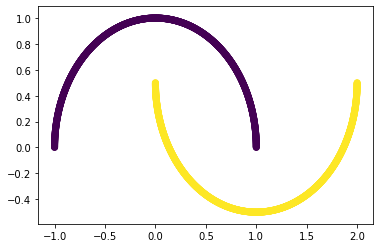

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
def draw_svm(X,y,C=1.0):
    plt.scatter(X[:,0],X[:,1],c=y)
    clf = SVC(kernel='rbf', C=C, gamma='auto')
    clf_fit = clf.fit(X,y)
    
    # gca - get current axes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create meshgrid
    x1 = np.linspace(xlim[0], xlim[1], 200)
    x2 = np.linspace(ylim[0], ylim[1], 200)
    
    xx,yy = np.meshgrid(x1, x2)
    x = np.vstack([xx.flatten(), yy.flatten()]).T
    z = clf.decision_function(x).reshape(xx.shape)
    
    # Plot the boundary
    ax.contour(xx,yy,z,colors='k', levels = [-1,0,1], alpha = 0.5,
               linestyles = ['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:,0],
              clf.support_vectors_[:,1],
              s = 100, linewidth=1)
    plt.show()
    return clf_fit

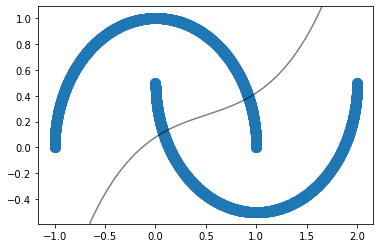

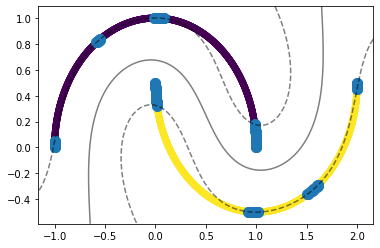

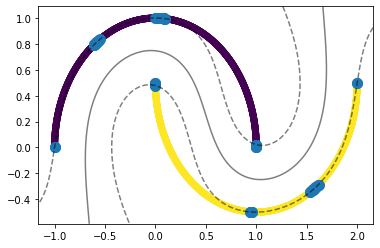

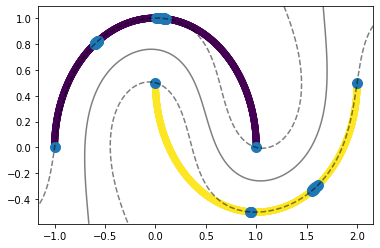

0.874
1.0
1.0
1.0


In [5]:
clf_arr = []
clf_arr.append(draw_svm(X,y,0.0001))
clf_arr.append(draw_svm(X,y,0.1))
clf_arr.append(draw_svm(X,y,1))
clf_arr.append(draw_svm(X,y,10))

for i, clf in enumerate(clf_arr):
    print(clf.score(X,y))
